In [89]:
#Import libraries 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 

from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

from skimage import exposure 

#Import dataset 
from sklearn.datasets import load_digits
digits = load_digits()

In [90]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


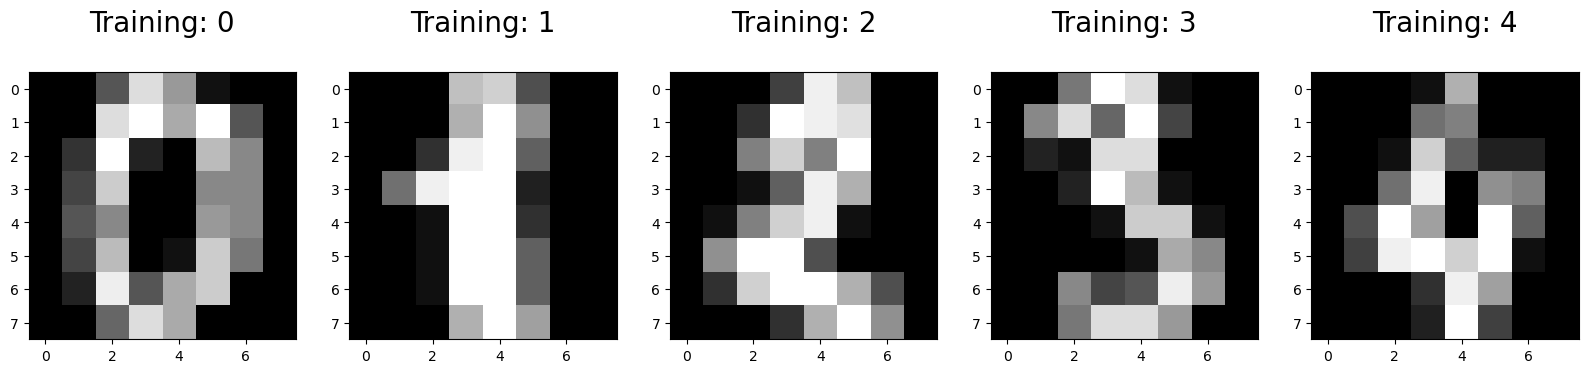

In [91]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [92]:
#Overview of data 
df_digits = pd.DataFrame(digits.data) 
df_digits.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [93]:
#Determine X and y 
X, y = digits.data, digits.target 

In [94]:
#Preprocess images - normalise pixel values 
X = X.reshape(-1 ,8, 8, 1)  
X = X / 255.0  

In [95]:
#Preprocess image - contrast stretching 
X = X.reshape(-1 ,8, 8) 
X_prepro = [] 

for i in X: 
    p2, p98 = np.percentile(i, (2,98)) 
    i_rescale = exposure.rescale_intensity(i, in_range = (p2, p98)) 
    
    i_flat = i_rescale.flatten() 
    X_prepro.append(i_flat)
 
X_prepro = np.array(X_prepro) 

##### Purpose of training and test set 
A dataset is split into training and test set to determine how effective the trained model will be in discerning new data. 

The model is given the train set from which it learns from predefined features to predict an outcome for test data. Sometimes a validation set might be used to test the training set during the training of the model and is used to tune the hyperparameters of the model. 

Once the model has been completely trained, it is used to make predictions on the test set. The test set is independent of the train set. The predictions are then compared to the known labels of the test set. 

How well the model is able to make predictions on the test set is assessed by metrics such as accuracy, precision, recall and the f1 score. The model either fits well, is underfitted or overfitted. In the case of the latter two, the model needs to be adjusted until it fits well.   

In [96]:
#Split data into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X_prepro, y, test_size = 0.3, random_state = 42)  

##### Parameters

The Random Forest Classifier takes the following parameters: n_estimator, max_depth and min_samples_split. 

The n_estimators determines how many trees the classifier will have.  
The max_depth regulates the distance between the root node and leaf nodes i.e. how many layers there are.    
The min_samples_split is the minimum numbers of observations that the algrorithm will split node into. 


For large datasets a higher number of trees is appropriate, meaning a higher n_estimators number. This dataset has less than 2000 samples, so it is not as big as other datasets. The Fashion MNIST has 70k images and an n_estimators of at least 100 was used. For this reason, this parameter will be tuned with a smaller n_estimators number reflecting the smaller dataset - 25.  

In [97]:
#Create Random Forest Classifier from sklearn 
rf_class = RandomForestClassifier(n_estimators = 25, random_state = 42) 

In [98]:
#Train classifier 
rf_class.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=25, random_state=42)

In [99]:
#Make prediction on test set 
y_pred = rf_class.predict(X_test)  

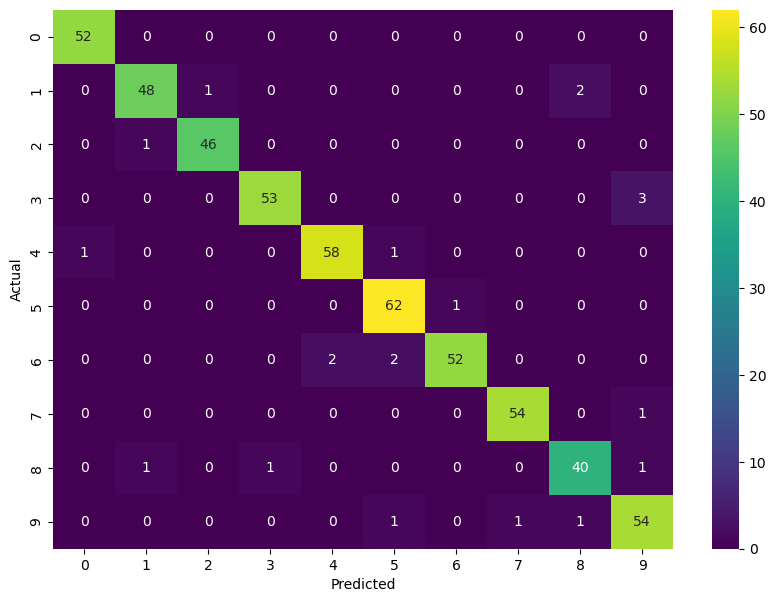

In [100]:
#Confusion matrix 
conf_matrix = confusion_matrix(y_pred, y_test) 

cm_df = pd.DataFrame(conf_matrix) 
cm_df 

plt.figure(figsize = (10,7)) 
sns.heatmap(cm_df, cmap = 'viridis', annot = True, fmt = "d") 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show() 

The model mostly struggles with class 9. There are 3 instances where class 3 was predicted as 9 ad one each for 7 and 8. Class 9 was also wrongly predicted to be class 5, 7 and 8 once each. The other class the model struggled with was 6. There are two instances each where the model predicted class 4 and 5 instead. 

In [101]:
#Report accuracy, precision, recall, f1 score 
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('\nClassification Report\n\n', classification_report(y_test, y_pred))

Accuracy score: 0.9611111111111111

Classification Report

               precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.94      0.96      0.95        50
           2       0.98      0.98      0.98        47
           3       0.95      0.98      0.96        54
           4       0.97      0.97      0.97        60
           5       0.98      0.94      0.96        66
           6       0.93      0.98      0.95        53
           7       0.98      0.98      0.98        55
           8       0.93      0.93      0.93        43
           9       0.95      0.92      0.93        59

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



The accuracy, precision, recall and f1 all have a score of 0.96. This is very close to 1, which shows that the model is able to predict the correct label most of the time.  

In [102]:
#Hyperparameter tuning using Gridsearch 
param_grid = {
    'n_estimators' : [10, 50, 100], 
    'max_depth' : [None, 10, 20],  
    'min_samples_split' : [2, 5, 10]
} 

grid_search = GridSearchCV(rf_class, param_grid, cv = 5) 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=25, random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [103]:
#Select value for parameter to use during testing on test data 
best_rf_class = grid_search.best_estimator_ 
best_rf_class.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [104]:
best_y_pred = best_rf_class.predict(X_test)

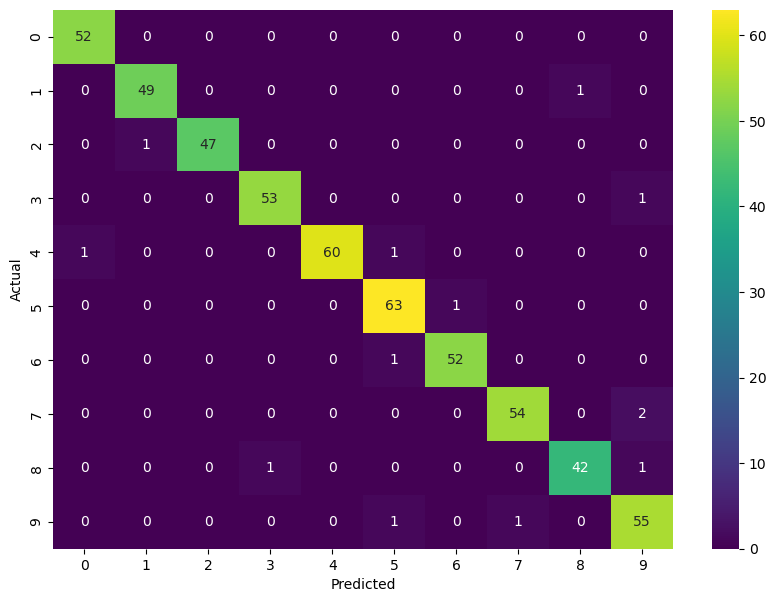

In [105]:
#Confusion matrix for Random Forest model on test set 
conf_matrix = confusion_matrix(best_y_pred, y_test) 

cm_df = pd.DataFrame(conf_matrix) 
cm_df 

plt.figure(figsize = (10,7)) 
sns.heatmap(cm_df, cmap = 'viridis', annot = True, fmt = "d") 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show() 

All images in class 0 were correctly predicted and only one image was incorrectly classified as 0 when it was 4. This means it was the best performing class of the model. 

Class 7 was wrongly predicted as class 9 twice and class 3 and 8 each were wrongly predicted as class 9 once. Class 9 was also wrongly predicted as class 5 and 7 once each. This shows that the model struggled the most in identifying class 9, but also mis-identifying it as other classes more than any other. 

In [106]:
#Report accuracy, precision, recall, f1 score 
print('Accuracy score:', accuracy_score(y_test, best_y_pred))
print('\nClassification Report\n\n', classification_report(y_test, best_y_pred))

Accuracy score: 0.975925925925926

Classification Report

               precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       0.98      0.98      0.98        54
           4       0.97      1.00      0.98        60
           5       0.98      0.95      0.97        66
           6       0.98      0.98      0.98        53
           7       0.96      0.98      0.97        55
           8       0.95      0.98      0.97        43
           9       0.96      0.93      0.95        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



Accuracy is 0.976. This is very close to 1, which shows that the majority of samples were correct classified. 

The classification report shows that the precision score is 0.98. This is close to 1 and shows that when the model classified an image it was correct most of the time.
The recall score is also 0.98, which means that the the majority of the time the model predicted the true positive. 
Finally, the f1 score is 0.98. This inidicates the model's predictions have a high qaulity and completeness.    

Overall, this shows that the model is very good at predicting the correct instance of a class. 